In [2]:
import warnings, re
warnings.filterwarnings(action='ignore')

In [3]:
import pandas as pd
data = pd.read_csv('C:/Python/review_table.csv',encoding='utf-8')
data.head()

,review_num,id,user,star,month,review,keyword1,keyword2,keyword3
0,1,1169465,Cyril Grace R,50,November,this place had 360 degree vies of seoul.best t...,NaN,NaN,NaN
1,2,553546,Cyril Grace R,50,January,best place for shopping. suggested time is aft...,NaN,NaN,NaN
2,3,324888,Cyril Grace R,50,January,i love this palace especially the change of gu...,NaN,NaN,NaN
3,4,1169465,Blossom,50,May,The Korean Drama that left the biggest impact ...,NaN,NaN,NaN
4,5,1169465,Kens,40,January,I went to Namsan on my first day at Seoul. I w...,NaN,NaN,NaN


In [4]:
data.columns = ['review_num', 'id', 'user', 'star', 'month', 'review', 'impression' ,'mood', 'cost']
data.head()

,review_num,id,user,star,month,review,impression,mood,cost
0,1,1169465,Cyril Grace R,50,November,this place had 360 degree vies of seoul.best t...,NaN,NaN,NaN
1,2,553546,Cyril Grace R,50,January,best place for shopping. suggested time is aft...,NaN,NaN,NaN
2,3,324888,Cyril Grace R,50,January,i love this palace especially the change of gu...,NaN,NaN,NaN
3,4,1169465,Blossom,50,May,The Korean Drama that left the biggest impact ...,NaN,NaN,NaN
4,5,1169465,Kens,40,January,I went to Namsan on my first day at Seoul. I w...,NaN,NaN,NaN


In [5]:
# ascending=False 하면 내림차순
data = data.sort_values(by=['id'], axis=0, ascending = True)

# 2) index reset하기
data = data.reset_index(drop=True)
data.head()

,review_num,id,user,star,month,review,impression,mood,cost
0,2216,320359,WandeReen,30,February,Great place to visit for the historical feel a...,NaN,NaN,NaN
1,2234,320359,Itay V,40,November,"A beautiful palace, ine of the nicest in Seoul...",NaN,NaN,NaN
2,2233,320359,Huei W,40,November,Secret garden for the Palace is totally recomm...,NaN,NaN,NaN
3,2231,320359,Exceeding_Joy,40,October,This tour includes a guided tour of the palace...,NaN,NaN,NaN
4,2070,320359,Ian K,40,October,"Like Gyeongbokgung Palace, my wife and I been ...",NaN,NaN,NaN


In [6]:
impression = [ 'friendly','modern','fun', 'local','traditional', 'beautiful','amazing', 'accessible', 
             'interesting','historical','peaceful','eastern','disappointing','dirt','memorial',
         'lovely','nice','ceremonial', 'typical', 'cheerful',  'unbelievable','extraordinary',
         'brilliant','unforgettable','exotic', 'enjoyable', 'energetic','excellent','special','tough',
         'convenient','confortable','thoughtful','spectacular', 'diverse','disappointed', 
          'stimulating','innovative','instagramable',  'photogenic','pleasant','likely','organized',
         'manicured','incredible','impressive', 'foggy','satisfied', 'unique','funny','futuristic',
         'romantic', 'famous','fantastic','rare','historic', 'horrible', 'reasonable','ideal','hot',
          'glorious', 'renowned','happy','wooden','weird','vigorous','awful','archaeological',
         'virtual','young','best','wonderful','warm','walkable','awesome','rural']

cost = ['free','expensive', 'cheap','luxurious','worth']

mood = ['vast','extra','worthy', 'big','ultra','extensive','smallish','magnificent', 'huge','colorful',
        'gothic', 'artistic', 'upper','beauty','affordable', 'wide','pretty']

In [7]:
import pandas as pd, numpy as np
mindmap = {}
mindmap["impression"] = impression
mindmap["cost"] = cost
mindmap["mood"] = mood

In [8]:
print(mindmap['cost'])

['free', 'expensive', 'cheap', 'luxurious', 'worth']


In [9]:
idlist=list(data['id'].unique())
idlist.sort()

In [10]:
print(idlist)

[320359, 324887, 324888, 324891, 324907, 325043, 502576, 553213, 553246, 553546, 554528, 554533, 554537, 554551, 554582, 554634, 561808, 590748, 592484, 592486, 592490, 592495, 592506, 592508, 592658, 598499, 609340, 1046419, 1169465, 1235392, 1379963, 1489411, 1519813, 1549822, 1551271, 1552278, 1554603, 1579821, 1604009, 1643534, 1675961, 1758805, 1761206, 1809989, 1862191, 1868571, 1957627, 1958940, 1960138, 1962594, 1990451, 2008729, 2011401, 2014599, 2041648, 2092468, 2094166, 2203080, 2293568, 2293574, 2341867, 2341905, 2341922, 2367750, 2367771, 2476788, 2519674, 2571660, 3295622, 3568803, 3600495, 3670803, 3694519, 3805397, 3808315, 3821928, 3871936, 3901164, 3901265, 3901448, 3957040, 4084344, 4084386, 4094861, 4095685, 4096021, 4427670, 4798698, 4798711, 4798715, 5924606, 5924658, 6509932, 6656879, 6671988, 6847826, 6847900, 6960656, 7028449, 7060791, 7264192, 7376481, 7717373, 7891946, 8029083, 8077282, 8842556, 9796296, 10020511, 10020529, 10020530, 10725552, 10813620, 1192

In [11]:
import nltk, re
from nltk import word_tokenize

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)

def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

def cleanText(readData):
 
    #텍스트에 포함되어 있는 특수 문자 제거
 
    text = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]', '', readData)
 
    return text

In [12]:
data['token'] = list(map(cleanText, data['review']))
data['token'] = list(map(removeStopWords, data['token']))
data['token'] = list(map(word_tokenize, data['token']))
#data['token'] = list(map(removePunc, data['token']))

In [13]:
data.head()

,review_num,id,user,star,month,review,impression,mood,cost,token
0,2216,320359,WandeReen,30,February,Great place to visit for the historical feel a...,NaN,NaN,NaN,"[Great, place, visit, historical, feel, explor..."
1,2234,320359,Itay V,40,November,"A beautiful palace, ine of the nicest in Seoul...",NaN,NaN,NaN,"[beautiful, palace, ine, nicest, Seoul, many, ..."
2,2233,320359,Huei W,40,November,Secret garden for the Palace is totally recomm...,NaN,NaN,NaN,"[Secret, garden, Palace, totally, recommended,..."
3,2231,320359,Exceeding_Joy,40,October,This tour includes a guided tour of the palace...,NaN,NaN,NaN,"[tour, includes, guided, tour, palace, grounds..."
4,2070,320359,Ian K,40,October,"Like Gyeongbokgung Palace, my wife and I been ...",NaN,NaN,NaN,"[Like, Gyeongbokgung, Palace, wife, day, Chang..."


In [14]:
data['label'] = None

In [15]:
for i in range(len(data['token'])):
    tag = []
    for word in data['token'][i]:
        if word in mindmap['impression']:
            tag.append("B-Impression")
        elif word in mindmap['cost']:
            tag.append("B-Cost")
        elif word in mindmap['mood']:
            tag.append("B-Mood")
        else:
            tag.append("O")
    data['label'][i] = tag

In [16]:
print(data['token'][0])
print(data['label'][0])

['Great', 'place', 'visit', 'historical', 'feel', 'exploration', 'Colours', 'winter', 'generally', 'dull', 'good', 'cultural', 'heritage', 'site']
['O', 'O', 'O', 'B-Impression', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']


In [17]:
print(len(data['token'][0]))
print(len(data['label'][0]))

14
14


In [18]:
print(data['review'][0])

Great place to visit for the historical feel and exploration. Colours in the winter are generally dull, but was a good cultural heritage site.


In [19]:
print(data['token'][0])

['Great', 'place', 'visit', 'historical', 'feel', 'exploration', 'Colours', 'winter', 'generally', 'dull', 'good', 'cultural', 'heritage', 'site']


In [20]:
print(data['review'][1])

A beautiful palace, ine of the nicest in Seoul. There are many events and weddings going on on premise with traditional clothing.


In [21]:
print(data['token'][1])

['beautiful', 'palace', 'ine', 'nicest', 'Seoul', 'many', 'events', 'weddings', 'going', 'premise', 'traditional', 'clothing']


In [22]:
data['label']

0       [O, O, O, B-Impression, O, O, O, O, O, O, O, O...
1       [B-Impression, O, O, O, O, O, O, O, O, O, B-Im...
2                             [O, O, O, O, O, O, O, O, O]
3       [O, O, O, O, O, O, O, O, O, O, O, O, B-Impress...
4       [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...
                              ...                        
4446    [B-Impression, O, B-Impression, O, O, O, O, O,...
4447    [O, O, O, O, O, O, O, O, O, O, O, O, B-Impress...
4448    [O, O, O, O, O, O, O, B-Impression, O, O, O, O...
4449               [O, O, O, O, O, O, O, O, B-Cost, O, O]
4450    [O, B-Impression, O, O, O, O, O, O, O, B-Impre...
Name: label, Length: 4451, dtype: object

In [23]:
data.head()

,review_num,id,user,star,month,review,impression,mood,cost,token,label
0,2216,320359,WandeReen,30,February,Great place to visit for the historical feel a...,NaN,NaN,NaN,"[Great, place, visit, historical, feel, explor...","[O, O, O, B-Impression, O, O, O, O, O, O, O, O..."
1,2234,320359,Itay V,40,November,"A beautiful palace, ine of the nicest in Seoul...",NaN,NaN,NaN,"[beautiful, palace, ine, nicest, Seoul, many, ...","[B-Impression, O, O, O, O, O, O, O, O, O, B-Im..."
2,2233,320359,Huei W,40,November,Secret garden for the Palace is totally recomm...,NaN,NaN,NaN,"[Secret, garden, Palace, totally, recommended,...","[O, O, O, O, O, O, O, O, O]"
3,2231,320359,Exceeding_Joy,40,October,This tour includes a guided tour of the palace...,NaN,NaN,NaN,"[tour, includes, guided, tour, palace, grounds...","[O, O, O, O, O, O, O, O, O, O, O, O, B-Impress..."
4,2070,320359,Ian K,40,October,"Like Gyeongbokgung Palace, my wife and I been ...",NaN,NaN,NaN,"[Like, Gyeongbokgung, Palace, wife, day, Chang...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."


샘플의 최대 길이 : 616
샘플의 평균 길이 : 36.555156


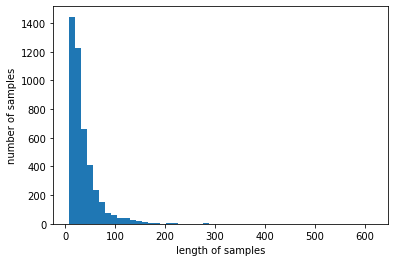

In [24]:
import matplotlib.pyplot as plt

print('샘플의 최대 길이 : %d' % max(len(l) for l in data['token']))
print('샘플의 평균 길이 : %f' % (sum(map(len, data['token']))/len(data['token'])))
plt.hist([len(s) for s in data['token']], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [25]:
print("Number of total samples :", data.shape[0])
print("Number of samples less than 100 :",sum([1 for i in data['token'] if len(i) <= 100]))

Number of total samples : 4451
Number of samples less than 100 : 4255


In [26]:
from tensorflow.keras.preprocessing.text import Tokenizer

max_words = 4000
text_tokenizer = Tokenizer(num_words = max_words, oov_token='OOV')
text_tokenizer.fit_on_texts(data['token'])

label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(data['label'])

vocab_size = max_words 
tag_size = len(label_tokenizer.word_index) + 1

In [27]:
# 정수 인코딩
X_train = text_tokenizer.texts_to_sequences(data['token'])
y_train = label_tokenizer.texts_to_sequences(data['label'])

In [28]:
label_tokenizer.word_index

{'o': 1, 'b-impression': 2, 'b-cost': 3, 'b-mood': 4}

In [29]:
print(X_train[0])
print(y_train[0])

[9, 3, 4, 339, 195, 2665, 945, 229, 1258, 2927, 8, 413, 893, 230]
[1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [30]:
index_to_text = text_tokenizer.index_word
index_to_label = label_tokenizer.index_word

decoded = []
for index in X_train[0] : # 첫번째 샘플 안의 인덱스들에 대해서
    decoded.append(index_to_text[index]) # 다시 단어로 변환

print('기존 문장 : {}'.format(data['token'][0]))
print('빈도수가 낮은 단어가 OOV 처리된 문장 : {}'.format(decoded))

기존 문장 : ['Great', 'place', 'visit', 'historical', 'feel', 'exploration', 'Colours', 'winter', 'generally', 'dull', 'good', 'cultural', 'heritage', 'site']
빈도수가 낮은 단어가 OOV 처리된 문장 : ['great', 'place', 'visit', 'historical', 'feel', 'exploration', 'colours', 'winter', 'generally', 'dull', 'good', 'cultural', 'heritage', 'site']


In [31]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 100

X_train = pad_sequences(X_train, padding='post', maxlen=max_len)
y_train = pad_sequences(y_train, padding='post', maxlen=max_len)

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2, random_state=777)

In [33]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=tag_size)
y_test = to_categorical(y_test, num_classes=tag_size)


In [34]:
print('훈련 샘플 문장의 크기 : {}'.format(X_train.shape))
print('훈련 샘플 레이블의 크기 : {}'.format(y_train.shape))
print('테스트 샘플 문장의 크기 : {}'.format(X_test.shape))
print('테스트 샘플 레이블의 크기 : {}'.format(y_test.shape))

훈련 샘플 문장의 크기 : (3560, 100)
훈련 샘플 레이블의 크기 : (3560, 100, 5)
테스트 샘플 문장의 크기 : (891, 100)
테스트 샘플 레이블의 크기 : (891, 100, 5)


In [35]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Bidirectional, TimeDistributed
from keras.optimizers import Adam, SGD

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len, mask_zero=True))
model.add(Bidirectional(LSTM(256, return_sequences=True)))
model.add(TimeDistributed(Dense(tag_size, activation='softmax')))

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr = 0.05), metrics=['accuracy'])
model.fit(X_train, y_train, batch_size = 128, epochs = 50,  validation_data=(X_test, y_test))

Epoch 1/50
28/28 [==============================] - 2s 84ms/step - loss: 0.2188 - accuracy: 0.3272 - val_loss: 0.0365 - val_accuracy: 0.3254
Epoch 2/50
28/28 [==============================] - 1s 35ms/step - loss: 0.0198 - accuracy: 0.3377 - val_loss: 0.0117 - val_accuracy: 0.3310
Epoch 3/50
28/28 [==============================] - 1s 36ms/step - loss: 0.0083 - accuracy: 0.3405 - val_loss: 0.0066 - val_accuracy: 0.3315
Epoch 4/50
28/28 [==============================] - 1s 34ms/step - loss: 0.0056 - accuracy: 0.3409 - val_loss: 0.0059 - val_accuracy: 0.3317
Epoch 5/50
28/28 [==============================] - 1s 34ms/step - loss: 0.0053 - accuracy: 0.3409 - val_loss: 0.0057 - val_accuracy: 0.3319
Epoch 6/50
28/28 [==============================] - 1s 34ms/step - loss: 0.0056 - accuracy: 0.3409 - val_loss: 0.0061 - val_accuracy: 0.3316
Epoch 7/50
28/28 [==============================] - 1s 33ms/step - loss: 0.0054 - accuracy: 0.3409 - val_loss: 0.0060 - val_accuracy: 0.3318
Epoch 8/50
28

In [36]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))

28/28 [==============================] - 0s 7ms/step - loss: 0.0112 - accuracy: 0.3315

 테스트 정확도: 0.3315


In [46]:
total = 0
count = 0
for i in range(100):
    #i = 12 # 확인하고 싶은 테스트용 샘플의 인덱스.
    y_predicted = model.predict(np.array([X_test[i]])) # 입력한 테스트용 샘플에 대해서 예측 y를 리턴
    y_predicted = np.argmax(y_predicted, axis=-1) # 원-핫 인코딩을 다시 정수 인코딩으로 변경함.
    true = np.argmax(y_test[i], -1) # 원-핫 인코딩을 다시 정수 인코딩으로 변경함.

    print("{:15}|{:5}|{}".format("단어", "실제값", "예측값"))
    print(35 * "-")
    
    for w, t, pred in zip(X_test[i], true, y_predicted[0]):
        if w != 0: # PAD값은 제외함.
            if i == 1: 
                print("{:17}: {:7} {}".format(index_to_text[w], index_to_label[t].upper(), index_to_label[pred].upper()))
            if index_to_label[t].upper() == index_to_label[pred].upper():
                count += 1
            total += 1
    print("accuracy : ", count/total)

단어             |실제값  |예측값
-----------------------------------
accuracy :  1.0
단어             |실제값  |예측값
-----------------------------------
national         : O       O
cemetery         : O       O
huge             : B-MOOD  B-MOOD
OOV              : O       O
land             : O       O
middle           : O       O
city             : O       O
well             : O       O
kept             : O       O
impressive       : B-IMPRESSION B-IMPRESSION
memorial         : B-IMPRESSION B-IMPRESSION
OOV              : O       O
missing          : O       O
soldiers         : O       O
along            : O       O
OOV              : O       O
OOV              : O       O
graves           : O       O
cemetery         : O       O
includes         : O       O
museum           : O       O
photo            : O       O
exhibits         : O       O
snack            : O       O
bar              : O       O
convenience      : O       O
store            : O       O
picnic           : O       O
tables     

단어             |실제값  |예측값
-----------------------------------
accuracy :  0.9939710610932476
단어             |실제값  |예측값
-----------------------------------
accuracy :  0.9940071913703555
단어             |실제값  |예측값
-----------------------------------
accuracy :  0.994140625
단어             |실제값  |예측값
-----------------------------------
accuracy :  0.9942062572421785
단어             |실제값  |예측값
-----------------------------------
accuracy :  0.9942857142857143
단어             |실제값  |예측값
-----------------------------------
accuracy :  0.9943310657596371
단어             |실제값  |예측값
-----------------------------------
accuracy :  0.9943778110944528
단어             |실제값  |예측값
-----------------------------------
accuracy :  0.9944071588366891
단어             |실제값  |예측값
-----------------------------------
accuracy :  0.9944832659065833
단어             |실제값  |예측값
-----------------------------------
accuracy :  0.9945095168374817
단어             |실제값  |예측값
-----------------------------------
accuracy :  0.9

In [47]:
print("word by word accuracy : ", sum(accuracy)/len(accuracy))

word by word accuracy :  0.9937462450613509
